In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import mutual_info_classif
from sklearn.decomposition import PCA

In [11]:
# Load datasets
X_train = pd.read_csv('X_train_scaled.csv')
X_test = pd.read_csv('X_test_scaled.csv')

In [13]:
print(X_train.shape)
print(X_train.info())
X_train.describe()

(18284, 19)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18284 entries, 0 to 18283
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   satisfaction_level      18284 non-null  float64
 1   last_evaluation         18284 non-null  float64
 2   number_project          18284 non-null  float64
 3   average_montly_hours    18284 non-null  float64
 4   time_spend_company      18284 non-null  float64
 5   Work_accident           18284 non-null  float64
 6   promotion_last_5years   18284 non-null  float64
 7   salary                  18284 non-null  float64
 8   department_IT           18284 non-null  float64
 9   department_RandD        18284 non-null  float64
 10  department_accounting   18284 non-null  float64
 11  department_hr           18284 non-null  float64
 12  department_management   18284 non-null  float64
 13  department_marketing    18284 non-null  float64
 14  department_product_mng  18

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,hours_level
count,18284.000000,18284.000000,18284.000000,18284.000000,18284.000000,18284.000000,18284.000000,18284.000000,18284.000000,18284.000000,18284.000000,18284.000000,18284.000000,18284.000000,18284.000000,18284.000000,18284.000000,18284.000000,18284.000000
mean,0.007313,-0.035739,-0.069842,-0.006825,0.607963,0.098939,0.014165,0.494531,0.068967,0.037847,0.042879,0.047637,0.030683,0.050700,0.050700,0.269635,0.140943,0.176220,-0.165372
std,0.658384,0.524598,0.478660,0.536448,1.304486,0.298588,0.118176,0.605561,0.253406,0.190832,0.202590,0.213003,0.172461,0.219391,0.219391,0.443782,0.347972,0.381017,0.421247
min,-1.139369,-1.078177,-0.666667,-1.069307,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.666667
25%,-0.405547,-0.553659,-0.666667,-0.514851,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.666667
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.594453,0.446341,0.333333,0.485149,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.333333
max,1.114600,0.786778,1.000000,1.049505,7.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.333333


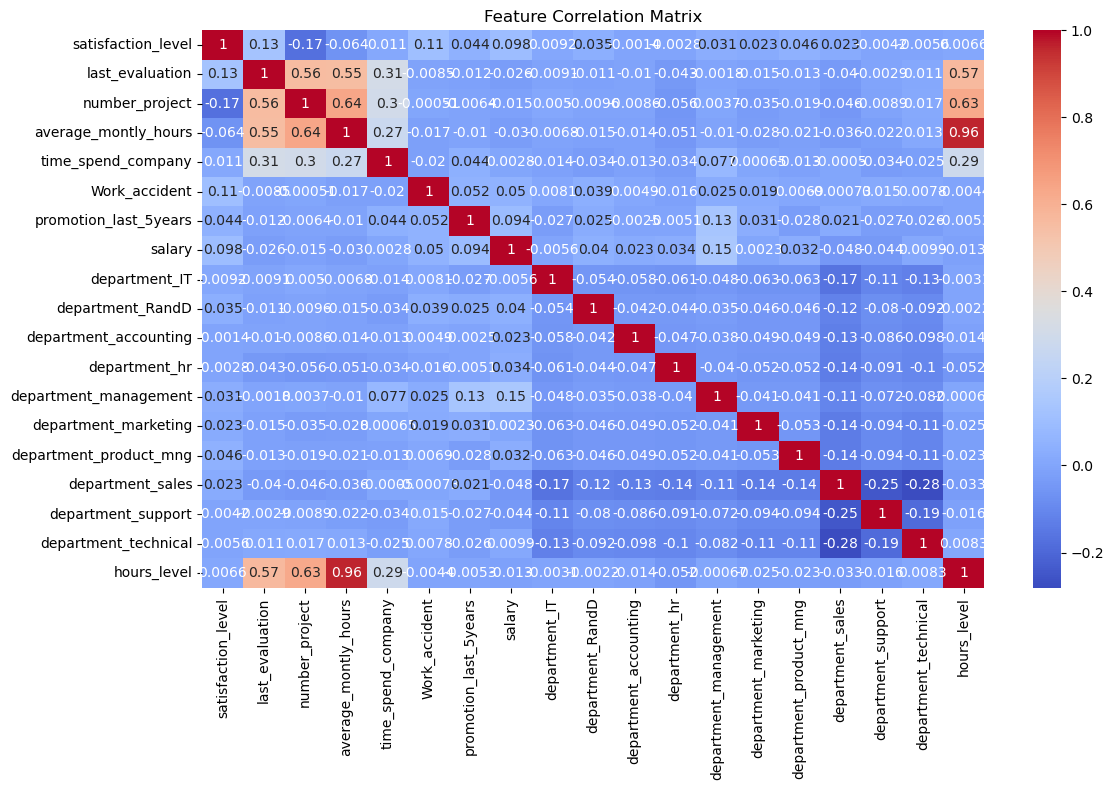

In [14]:
# Step1: Analyze Feature Importance: Correlation - Random Forest - Mutual Info

# 1. Correlation matrix between features
plt.figure(figsize=(12, 8))
sns.heatmap(X_train.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.tight_layout()
plt.show()

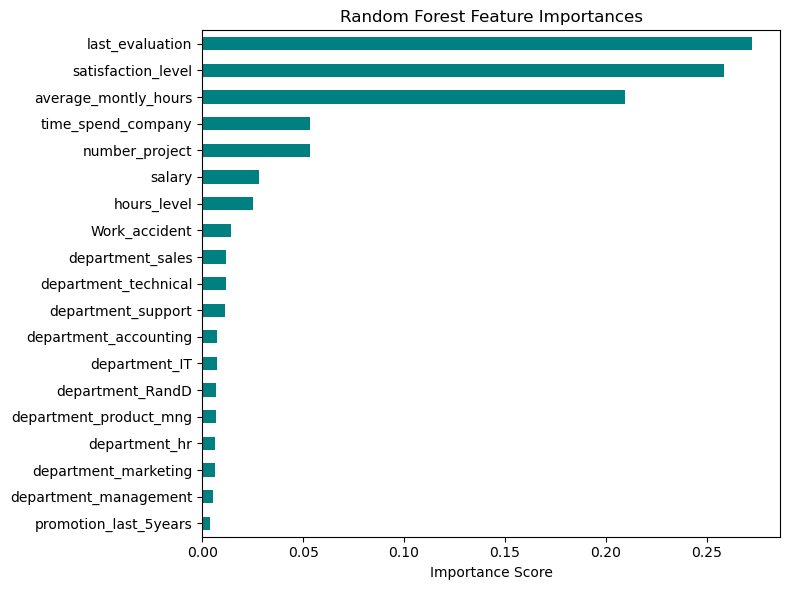

In [16]:
# 2. Random Forest feature importance (using dummy target just for analysis)
dummy_target = np.random.randint(0, 2, size=len(X_train))
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, dummy_target)
rf_importance = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values()

plt.figure(figsize=(8, 6))
rf_importance.plot(kind='barh', color='teal')
plt.title("Random Forest Feature Importances")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

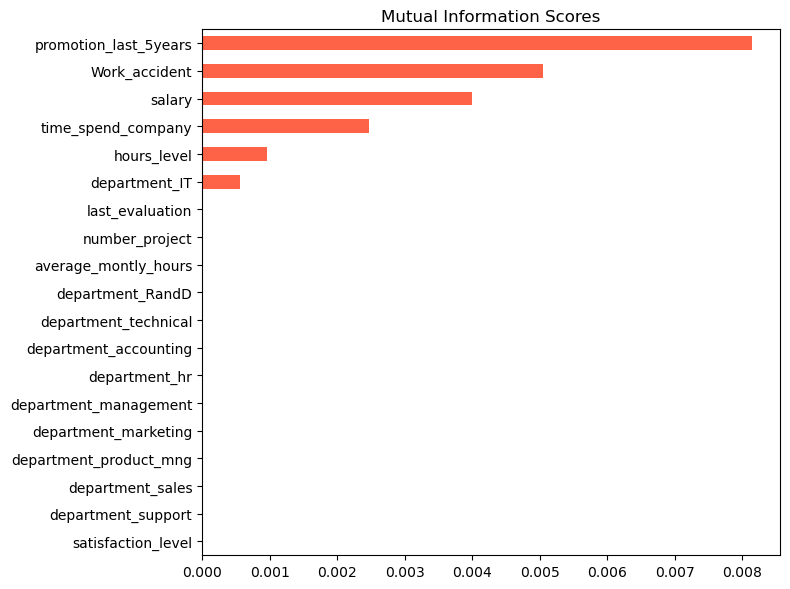

In [17]:
# 3. Mutual Information scores (also using dummy target)
mi_scores = mutual_info_classif(X_train, dummy_target)
mi_series = pd.Series(mi_scores, index=X_train.columns).sort_values()

plt.figure(figsize=(8, 6))
mi_series.plot(kind='barh', color='tomato')
plt.title("Mutual Information Scores")
plt.tight_layout()
plt.show()

In [18]:
# Step2: Try New Features (logical enhancements)

# 1. Combine satisfaction level & last evaluation
X_train['satisfaction_eval_interaction'] = X_train['satisfaction_level'] * X_train['last_evaluation']
X_test['satisfaction_eval_interaction']  = X_test['satisfaction_level'] * X_test['last_evaluation']

# 2. Binary flag for overworked employees (worked > 250 hrs)
X_train['overworked'] = (X_train['average_montly_hours'] > 250).astype(int)
X_test['overworked']  = (X_test['average_montly_hours'] > 250).astype(int)

# 3. Workload per project
X_train['workload_per_project'] = X_train['average_montly_hours'] / (X_train['number_project'] + 1)
X_test['workload_per_project']  = X_test['average_montly_hours'] / (X_test['number_project'] + 1)

# 4. Performance to satisfaction ratio
X_train['performance_satisfaction_ratio'] = X_train['last_evaluation'] / (X_train['satisfaction_level'] + 0.01)
X_test['performance_satisfaction_ratio']  = X_test['last_evaluation'] / (X_test['satisfaction_level'] + 0.01)


In [19]:
# Step3: Drop Less Useful or Highly Correlated Features

# 1. Detect and drop highly correlated features (correlation > 0.85)
corr_matrix = X_train.corr().abs()
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
high_corr = [col for col in upper_triangle.columns if any(upper_triangle[col] > 0.85)]

# 2. Detect and drop low importance features (importance < 0.01)
low_importance = rf_importance[rf_importance < 0.01].index.tolist()

# 3. Drop both sets
X_train.drop(columns=list(set(high_corr + low_importance)), inplace=True)
X_test.drop(columns=list(set(high_corr + low_importance)), inplace=True)


Before PCA: (18284, 13)
After PCA: (18284, 3)


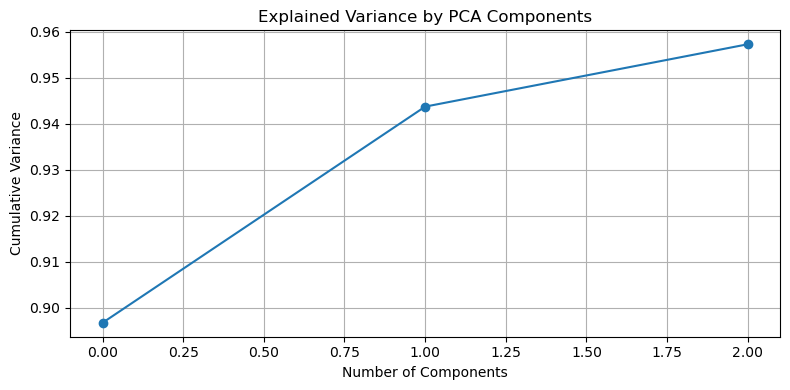

In [20]:
# Step4: Apply Dimensionality Reduction using PCA

# 1. Apply PCA (retain 95% of variance)
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# 2. Compare shape before & after PCA
print("Before PCA:", X_train.shape)
print("After PCA:", X_train_pca.shape)

# 3. Explained variance chart
plt.figure(figsize=(8, 4))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.title("Explained Variance by PCA Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Variance")
plt.grid(True)
plt.tight_layout()
plt.show()